<a href="https://colab.research.google.com/github/kumarsinghashu/Netflix-Movies-and-Tv-Shows-Clustering/blob/main/Netfilx_Movies_%26_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Netfilx Movies & TV shows clustering</u></b>


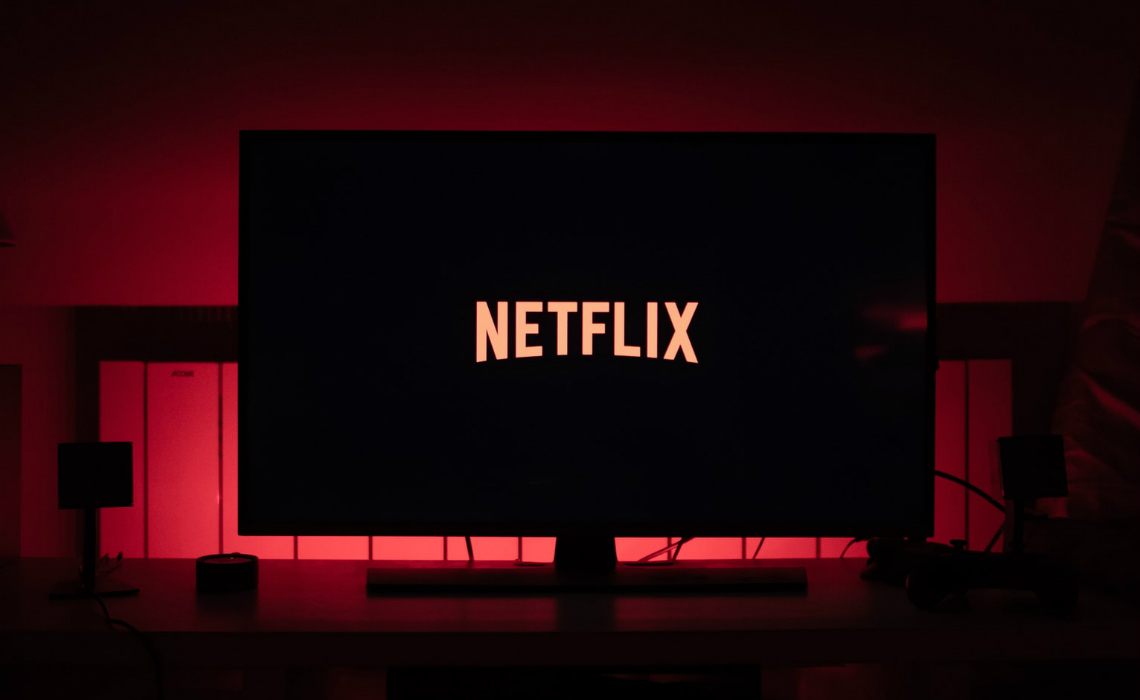

#<b/>Project Type - Unsupervised ML</b>


#<b/>Contribution - Individual
###Name - Ashutosh Kumar Singh</b>

#<b/>Project Summary -</b>

Clustering Netflix movies and TV shows involves grouping them into categories or clusters based on shared characteristics such as genre, theme, or user preferences. This clustering process can help users discover content they might be interested in more easily. Here's a summary of how this clustering might work:

1. **Data Collection**: Netflix collects extensive data on its movies and TV shows, including metadata like genre, director, cast, release year, user ratings, and user viewing history.

2. **Feature Extraction**: To cluster the content effectively, relevant features are extracted from the data. These features can include genre, user ratings, viewer demographics, keywords from the description, and more.

3. **Dimensionality Reduction**: High-dimensional data can be challenging to work with, so dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE may be applied to reduce the data to a manageable size while preserving important information.

4. **Clustering Algorithm Selection**: There are various clustering algorithms available, such as K-Means, Hierarchical Clustering, and DBSCAN. The choice of algorithm depends on the data and the desired outcome. For example, K-Means is a popular choice for numeric data, while Hierarchical Clustering can create a hierarchy of clusters.

5. **Clustering Process**: The selected clustering algorithm is applied to the feature-extracted and dimensionality-reduced data. The algorithm groups similar movies and TV shows into clusters based on the features.

6. **Cluster Evaluation**: The quality of the clusters is assessed using metrics like silhouette score or elbow method. This step helps determine the optimal number of clusters and the effectiveness of the clustering.

7. **Labeling**: Once clusters are formed, they can be labeled to give users an idea of what content is included in each cluster. For example, clusters can be labeled as "Action Movies," "Romantic Comedies," "Sci-Fi TV Shows," etc.

8. **User Personalization**: Netflix may also consider users' individual viewing history and preferences when presenting clusters. This way, clusters can be tailored to individual users, increasing the likelihood of recommending content they are more likely to enjoy.

9. **Display and Recommendation**: The clustered content is then presented to users on the Netflix platform, either as curated lists, personalized recommendations, or as part of a broader recommendation system.

10. **Feedback Loop**: Netflix continues to collect data on user interactions, including which content is watched and how users rate it. This feedback loop helps refine the clustering and recommendation algorithms over time, making recommendations even more accurate.

In summary, clustering Netflix movies and TV shows involves grouping similar content together to make it easier for users to discover and enjoy content tailored to their preferences. This process relies on data analysis, machine learning, and user feedback to continually improve the recommendation system.

#<b/>GitHub Link-


https://github.com/kumarsinghashu/Netflix-Movies-and-Tv-Shows-Clustering/blob/main/Netfilx_Movies_%26_TV_shows_clustering.ipynb

#<b/>Problem Statement</b>

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

##<b/>Important steps that required in this project</b>

1) EDA(Exploratory Data Analysis)

2) Here, we understanding in different countries what type of content is accessible.

3) Is Netflix has increasingly focusing on TV rather than movies in recent years.

4) Clustering similar content by matching text-based features


##<b/>Attribute Information</b>

1) **show_id :**  Unique ID for every Movie / Tv Show

2) **type :**  Identifier - A Movie or TV Show

3) **title :**  Title of the Movie / Tv Show

4) **director :**  Director of the Movie

5) **cast :**  Actors involved in the movie / show

6) **country :**  Country where the movie / show was produced

7) **date_added :**  Date it was added on Netflix

8) **release_year :**  Actual Releaseyear of the movie / show


9) **rating :**  TV Rating of the movie / show

10) **duration :**  Total Duration - in minutes or number of seasons

11) **listed_in :**  Genere

12) **description:**  The Summary description



# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Loading
df = pd.read_csv('/content/drive/MyDrive/My csv file data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## First View of Dataset

In [4]:
# First look of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Bottom rows of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Shape of data
rows=df.shape[0]
columns=df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


In [7]:
# Columns of data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


###Duplicate values

In [9]:
# Duplicate Values
df.duplicated().sum()

0

#### Function for extracting complete information of all columns in data set. Information as follows
* Missing values
* Percentage of missing values
* unique values




In [10]:
# function for determination of null values, unique values in columns and there features
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [11]:
# count of missing values and null values
Complete_columns_info(df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


<Figure size 1200x800 with 0 Axes>

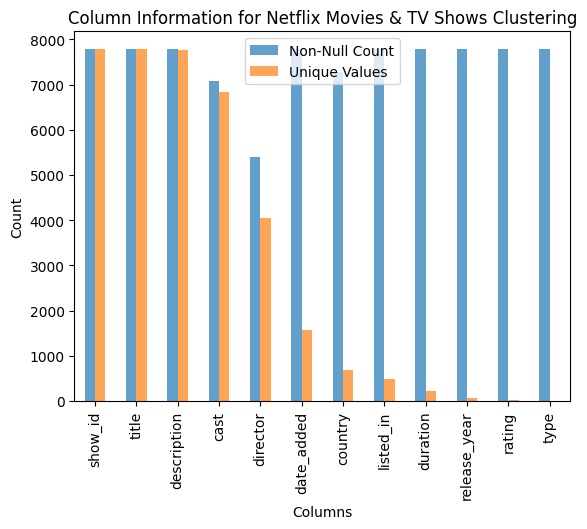

In [12]:
# Define the Complete_columns_info function
def Complete_columns_info(df):
    # Create a DataFrame to store the column information
    column_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Unique Values': df.nunique()
    })

    # Sort the DataFrame by the number of unique values (optional)
    column_info = column_info.sort_values(by='Unique Values', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    column_info.plot(kind='bar', alpha=0.7)
    plt.title('Column Information for Netflix Movies & TV Shows Clustering')
    plt.xlabel('Columns')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Call the function to visualize column information for your clustering dataset
Complete_columns_info(df)


- The dataset contains 7787 rows and 12 columns.

- No duplicate data are present in dataset.

- Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
-   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.

In [13]:
# total null values
df.isnull().sum().sum()

3631

* Total number of null values in dataset is 3631, with 2389 in director column, 718 in the cast column, 507 in the country column, 10 in the date column and 7 in the rating column. So handling is necessary for address these null values.

In [14]:
# Handling null values
df['cast'].fillna(value='No Cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [15]:
# 'date_added' and 'rating' contains an unnecessary portion of the data so we will drop them from dataset.
df.dropna(subset=['date_added', 'rating'], inplace = True)

In [16]:
#droping director column
df.drop(['director'],axis=1,inplace=True)

In [17]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#<b/>EDA(Exploratory Data Analysis)

###<b/>1. Count of Movies and Tv Shows</b>

In [18]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [19]:
# visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

This specific chart is a pie chart. I take this chart because it is useful or more effective in visualizing the distribution of categorical data. Here, the chart is used to represent the types of content watched on netfilx, which are categorized as 'Movie' and 'Tv Shows'.

<b/>2. What is/ are the insight(s) found from the chart?</b>

**Answer Here-**

The insight from the chart is the count of movies and Tv shows, here Tv shows constitue the majority that is 69.1%, while movies have smaller percentage that is 30.9%.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.




###<b/> 2.  Which Category has highest ratings?</b>

In [20]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [21]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [22]:
# type should be a categorical
df['type'] = pd.Categorical(df['type'])
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids


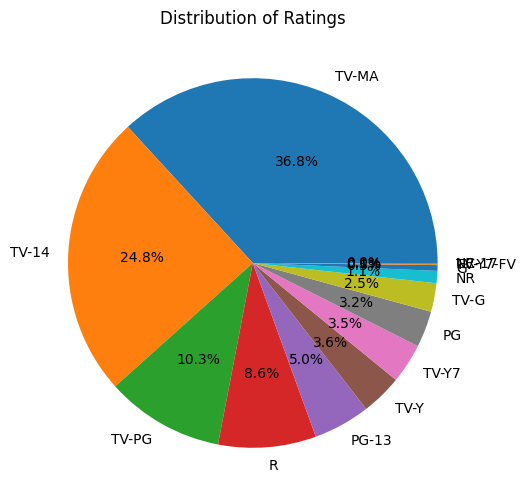

In [23]:
plt.figure(figsize=(8,6))
df["rating"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Ratings")
plt.ylabel("")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

I chose a pie chart to represent the distribution of ratings because it provides a visual representation of the proportions or percentages of each rating category.Pie charts are effective for showcasing the composition of a whole in terms of its parts.

<b/>2. What is/are the insight(s) found from the chart?</b>

**Answer Here-**

The size of each slice in the pie chart represents the proportion or percentage of content in each rating category. High number of TV-MA rating.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**


Understanding the distribution of ratings can provide valuable information about the audience's preferences and help in content curation and decision-making processes. For example, if a significant portion of the content falls under a particular rating category (e.g., TV-MA have 36.8% rating), it may indicate that there is a demand for mature or adult-oriented content.

In [24]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

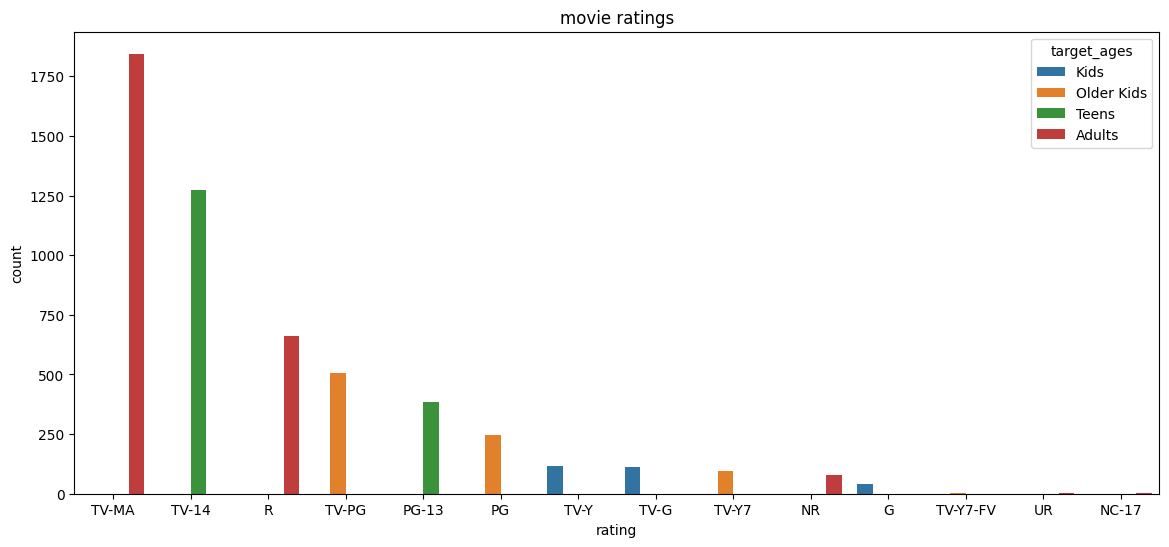

In [25]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

- Here we visualize that, in both cases TV-MA has the highest ratings for Tv shows. That indicates the rating cateogory wit the most content targeted to adult audiences.

###<b/>3. In which year maximum no. of Movies released?</b>

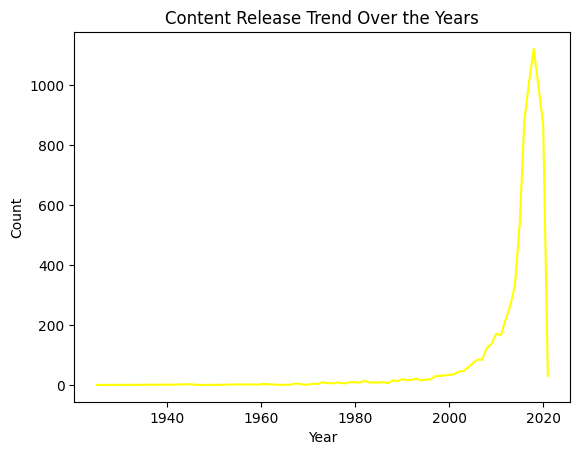

In [26]:
# Content Release Trend Over the Years
release_trend = df["release_year"].value_counts().sort_index()
release_trend.plot(kind="line",color='yellow')
plt.title("Content Release Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

**Answer Here-**

I chose a line chart to visualize the content release trend over the years because it effectively displays the changes and patterns in content releases over time.

<b/>2. What is/are the insight(s) found from the chart?</b>

**Answer Here-**

The insights gained from the chart include understanding the trend in content releases over the years. By observing the line chart, we can identify any increasing or decreasing patterns.


<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.</b>

**Answer Here-**

The gained insights can potentially help to create a positive business impact. Understanding the content release trend over the years can inform content planning, scheduling, and strategic decision-making. It can help identify popular release periods, seasonality patterns, or gaps in content releases.

###<b/>4. In which month maximum no. of movies will released?</b>

In [27]:
# adding the month and year of addition
df['month'] =pd.DatetimeIndex(df['date_added']).month

In [28]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: month, dtype: int64
int64


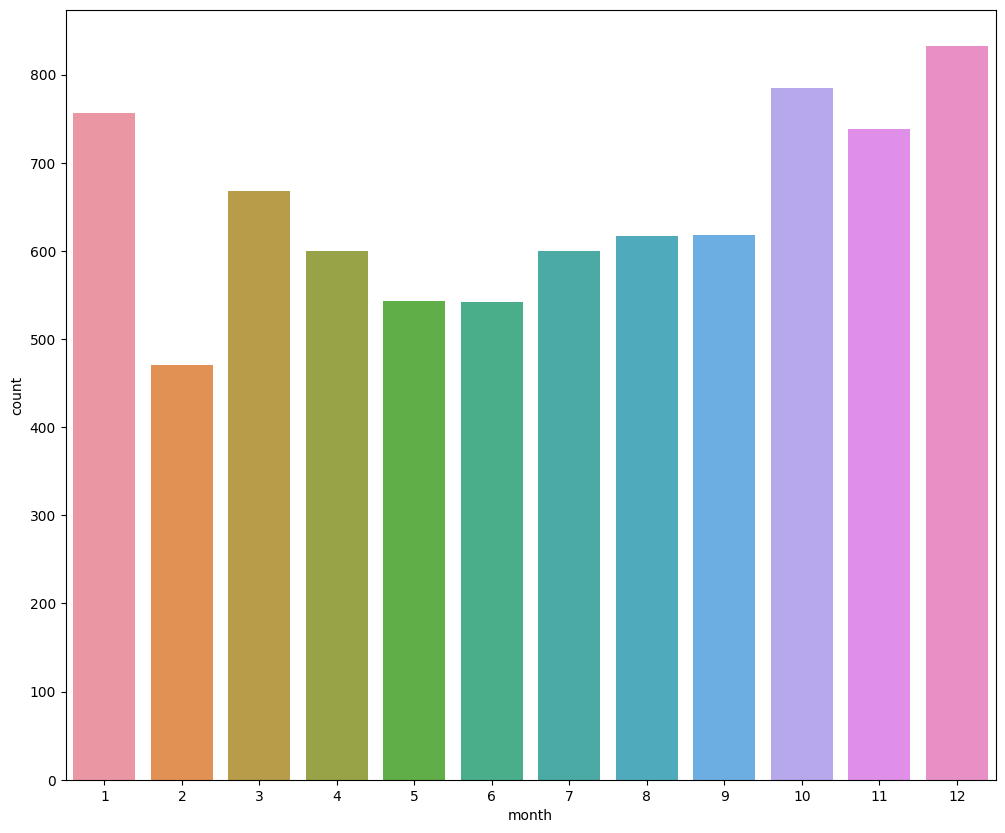

In [29]:
# Plotting the Countplot
# Check the 'month' column in your DataFrame
print(df['month'].value_counts())
print(df['month'].dtype)

#Plotting the Countplot

plt.figure(figsize=(12,10))
ax=sns.countplot(x='month', data=df)
plt.show()

<b/>1. Why did you pick the specific chart?</b>

A countplot is a suitable choice for visualizing the distribution of a categorical variable, such as the release months of movies. It allows you to easily see how many movies were released in each month, making it a good choice for understanding the pattern of movie releases over time.

<b/>2) What is/are the insight(s) found from the chart?</b>

To determine the month with the maximum number of movie releases, you can simply look at the chart. The month with the highest bar in the countplot will represent the month with the most movie releases.

<b/>3. Will the gained insights help creating a positive business impact?</b>

The insights gained from this chart can potentially have a positive business impact, especially for streaming platforms like Netflix. Knowing which months have the highest movie releases can help with content planning and marketing strategies.**The period from october to January expericenced the highest influx of new movies and Tv shows being added on Netefilx.**



<Axes: xlabel='month', ylabel='count'>

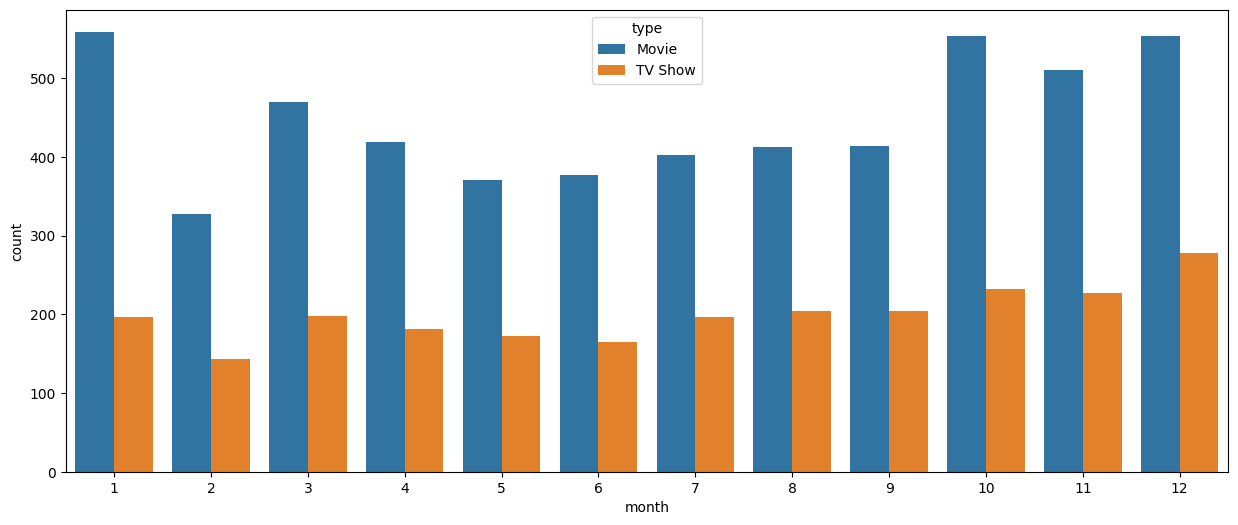

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month', hue='type',lw=5, data=df, ax=ax)

- <b/> From the above plot, it is evident that the highest amount of content is added to Netflix between the months of October and January. During this period, there is a significant spike in the number of additions, indicating a concentrated period of content updates and relases on the platform. This trend suggest that Netfilx startegically focuses on introudcing new movies and Tv shows during the end-of-year holiday season and the beginging of the new year, potentially to cater increased viewer demand during these month.

###<b/>5. Which genere is most popular?</b>

<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

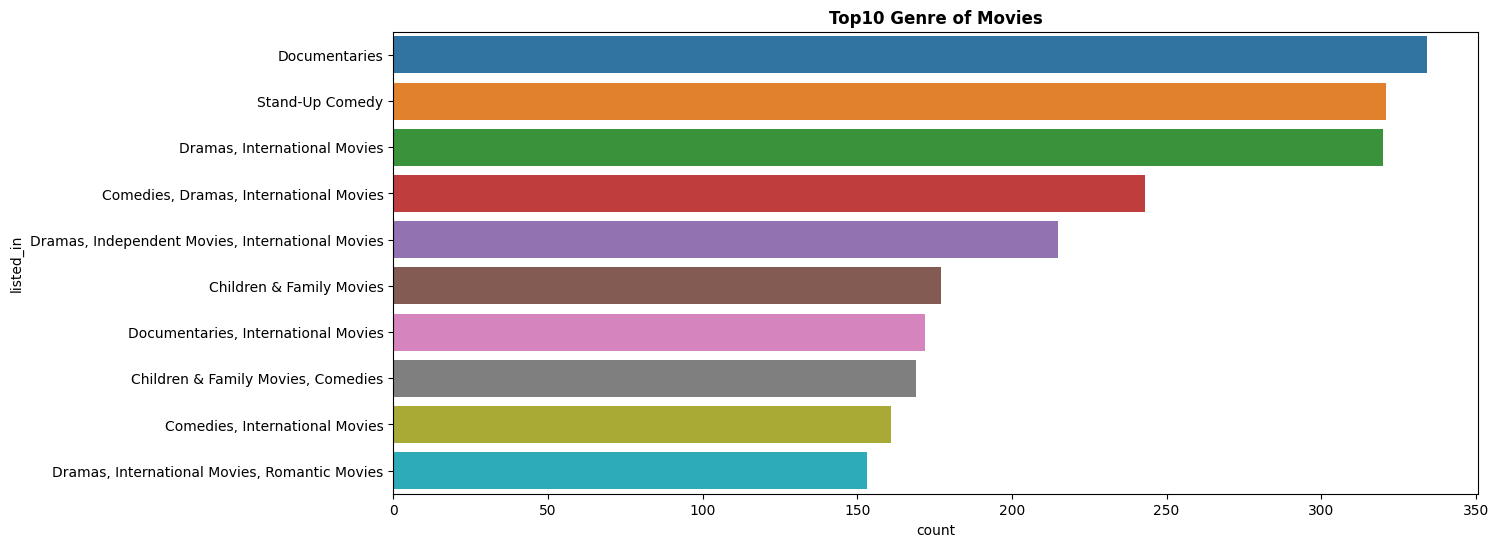

In [31]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

 **1. Why did you pick the specific chart?**

A countplot is suitable for visualizing the distribution of a categorical variable, such as movie genres. However, it's important to clarify how you plan to use this chart to determine the most popular genre. You might want to create a countplot of the genres and then select the genre with the highest count.
**2.What is/are the insight(s) found from the chart?**

Once you create the countplot of movie genres, you can identify the genre with the highest count (i.e., the tallest bar in the plot). This genre can be considered the most popular based on the dataset you have. However, keep in mind that this insight is specific to your dataset and may not necessarily reflect overall popularity in the broader context.

**3.Will the gained insights help create a positive business impact?**

Knowing the most popular genre on Netflix can be valuable for content acquisition and promotion strategies.


**Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies**

### <b/>6. Top 10 countries with the most content.</b>

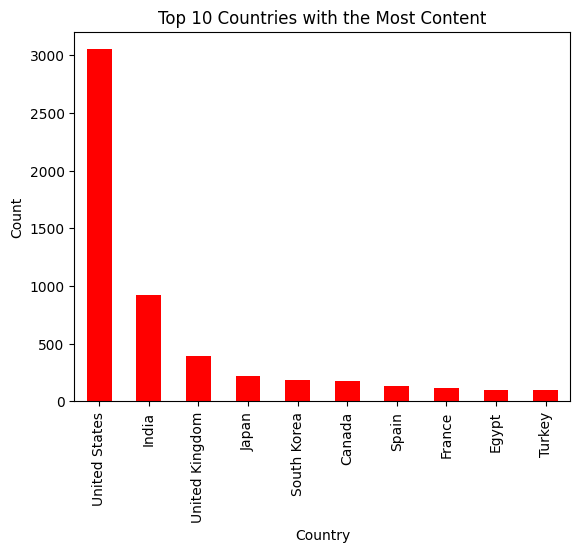

In [32]:
# Bar Chart - Top 10 Countries with the Most Content
top_countries = df["country"].value_counts().head(10)
top_countries.plot(kind="bar",color='red')
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

<b/>1. Why did you pick the specific chart?</b>

I chose a bar chart to showcase the top 10 countries with the most content because it allows for a clear visual comparison of the content count for each country.

<b/>2. What is/are the insight(s) found from the chart?</b>

By examining the heights of the bars, we can identify the United States has the highest number of content offerings

<b/>3. Will the gained insights help creating a positive business impact?</b>

<b/>Are there any insights that lead to negative growth? Justify with specific reason.</b>

The gained insights can help create a positive business impact. Understanding which countries have the most content can inform business decisions such as content acquisition, localization efforts, and marketing strategies. It can provide insights into audience preferences, popularity of content from different regions, and potential target markets for expansion.

In [33]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

,index,country
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
...,...,...
676,"Russia, United States, China",1
677,"Italy, Switzerland, France, Germany",1
678,"United States, United Kingdom, Canada",1
679,"United States, United Kingdom, Japan",1


<BarContainer object of 11 artists>

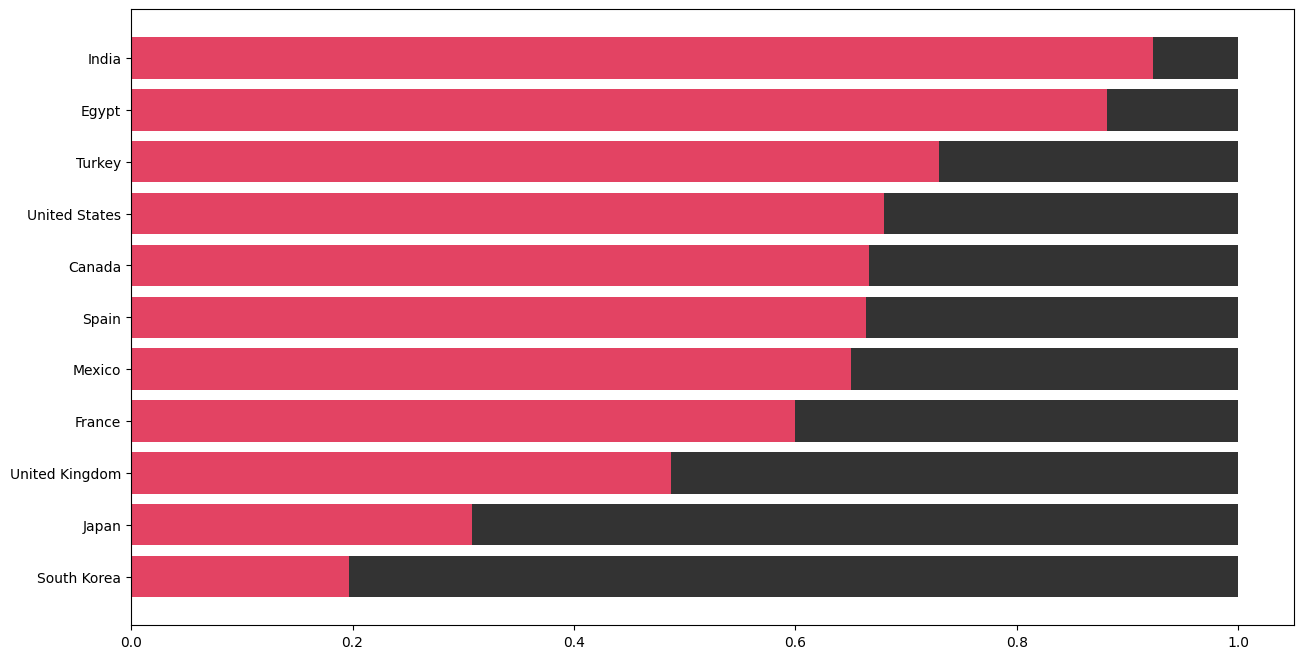

In [34]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['country'].value_counts()[:11].index
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'],
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'],
        color='black', alpha=0.8, label='TV Show')

**India has highest number of movies in netflix.**

###<b/>Which Season has the maximum duration?</b>

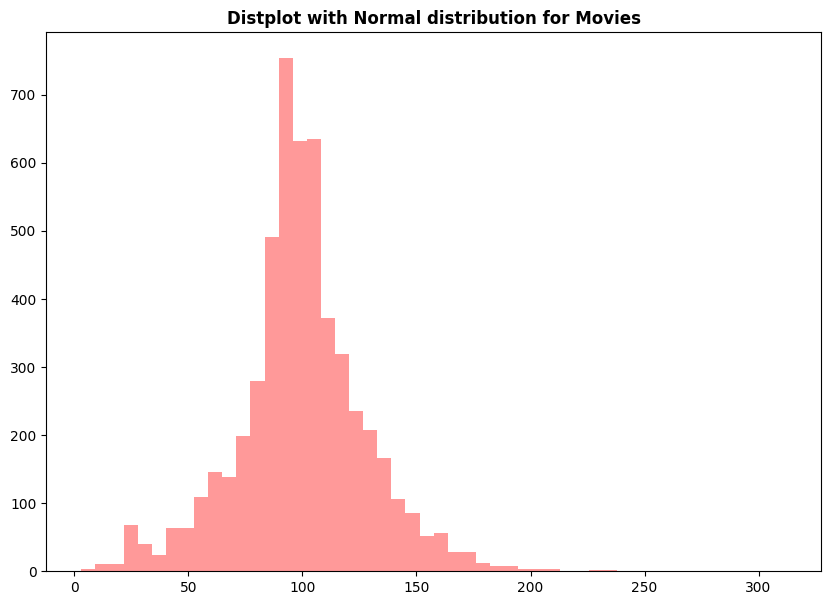

In [35]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<b/>Q1: Why I choose distplot as a specific chart?</b>

Using a distplot for this particular analysis is not the best choice because it's designed for visualizing the distribution of a single variable. Since you want to compare different seasons based on their maximum duration, a bar chart or similar categorical chart would be more appropriate.

<b/>Q2: What are the insights found from a distplot chart?</b>

If you were to use a distplot to visualize the distribution of a continuous variable (e.g., movie or TV show durations), you could gain insights into how the durations are distributed. For example, you might find that most content falls within a certain duration range, or you might identify outliers with exceptionally long or short durations.

<b/>Q3: Will the gained insights help create a positive business impact?</b>

The impact of insights gained from a distplot or any other type of data visualization depends on the context and the specific insights themselves. Here's how it could potentially impact a business:

**Content Planning:** If you discover that the majority of successful Netflix content falls within a certain duration range, this insight could inform content planning decisions. For example, the business might focus on creating more content that aligns with this preferred duration.

**User Engagement:** Understanding the distribution of content durations can help optimize user engagement. For instance, if users tend to favor shorter content, this might influence the recommendation algorithms to suggest shorter shows or movies.

**Advertising and Pricing:** For businesses that use advertising or subscription pricing models, knowing the distribution of content durations can impact ad placement strategies or pricing tiers.

However, these insights would apply more directly if you were analyzing content duration distribution using a distplot or a similar chart. To determine which season has the maximum duration, you should use a categorical chart (e.g., a bar chart) as mentioned in the previous response.


###**In distplot, it shows the most of the movies have duration of between 50 to 150**






<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

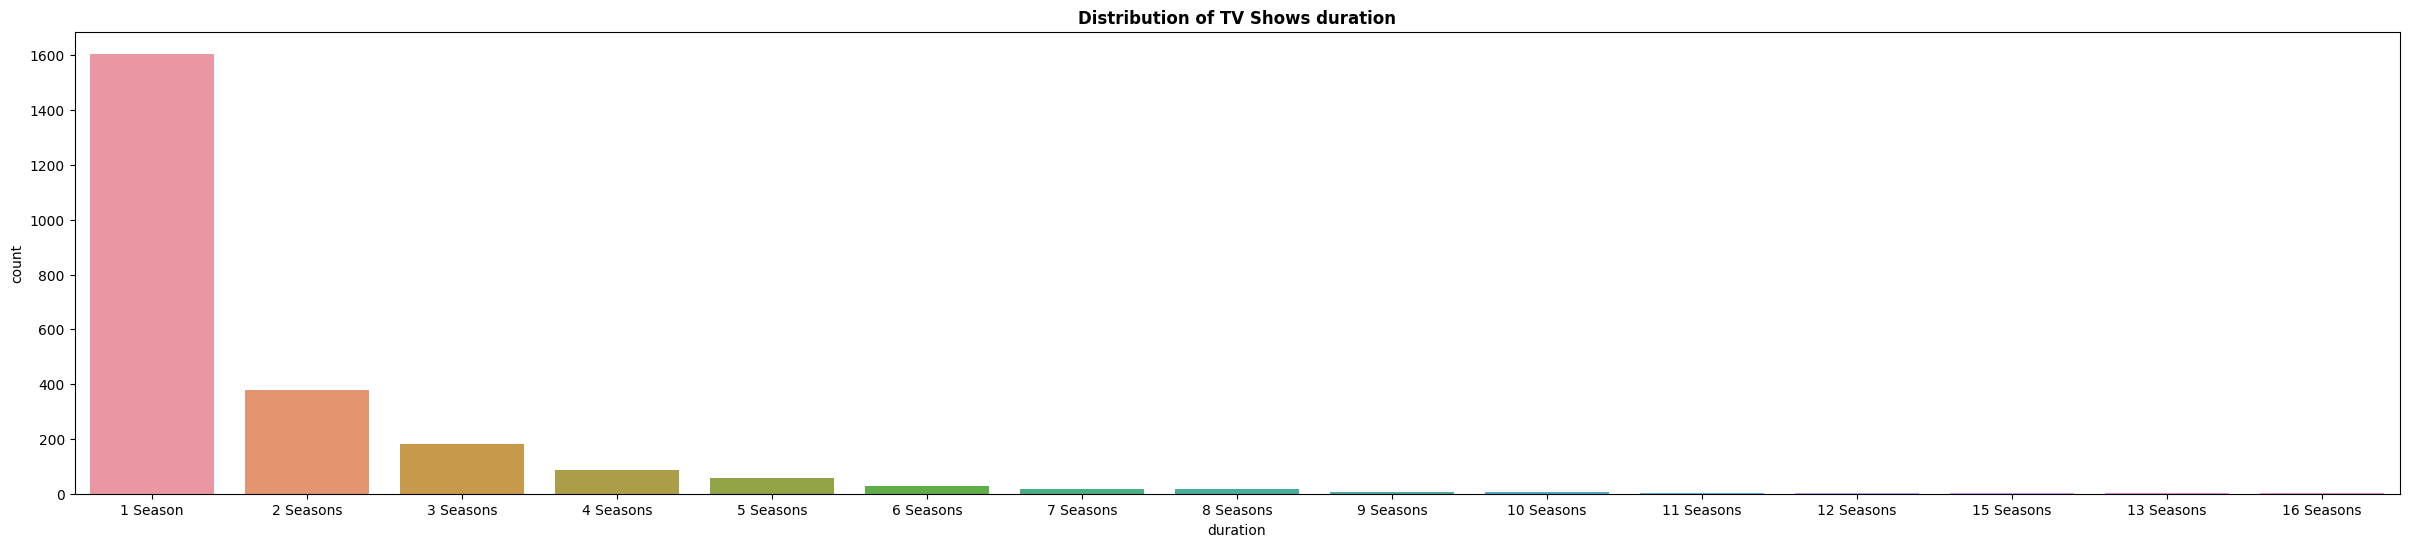

In [36]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

<b/>1. Why did you pick the specific chart?</b>

<b/>Answer Here.</b>

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

<b/>2. What is/are the insight(s) found from the chart?</b>

<b/>Answer Here</b>

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

<b/>3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here</b>

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

<b/>highest number of tv_shows consistig of season1</b>





In [37]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap


country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


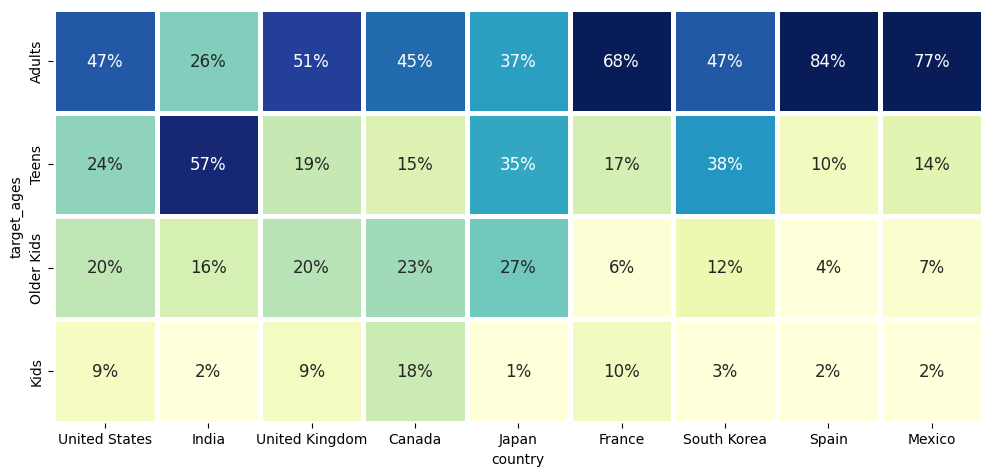

In [38]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

<b/>the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.</b>

###<b/>Count of Netfilx Originals</b>

In [39]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,10,1
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,3,1
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,Older Kids,10,1


<b/>Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.</b>

([<matplotlib.patches.Wedge at 0x78395bcc90f0>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

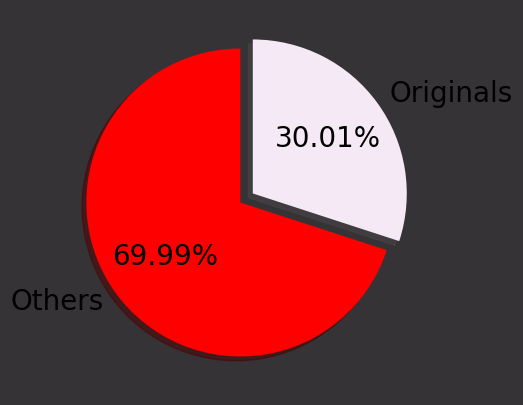

In [40]:
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

<b/>Based on the information, 30% movies released on Netflix. 70% movies added on Netflix were released earlier by different mode.

#<b/>Hypothesis Testing</b>

<b/>1.HYPOTHESIS TESTING</b>

- HO: movies rated for kids and older kids are at least two hours long .
- H1:movies rated for kids and older kids are not at least two hours long.


In [41]:
movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year_added,originals
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,2016,Yes
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,2018,No
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,2017,No
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,2020,No
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Adults,2020,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Older Kids,2020,No
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Adults,2020,No
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Teens,2019,No
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",Adults,2020,No


In [42]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [43]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [44]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [45]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1


In [46]:
#group_by duration and target_ages
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [47]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [48]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [49]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [50]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

<b/>2. HYPOTHESIS TESTING</b>

- H1:The duration which is more than 90 mins are movies

- HO:The duration which is more than 90 mins are NOT movies

In [51]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1,1


In [52]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])

In [53]:
#head of df_
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12,1


In [54]:
#group_by duration and TYPE
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [55]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.330417
dtype: float64
Std  duration    1.561099
dtype: float64


In [56]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [57]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [58]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

#<b/>Feature Engineering</b>

In [59]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
df.dtypes

show_id                 object
type                  category
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
target_ages           category
month                    int64
count                    int64
dtype: object

In [62]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [63]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [64]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [65]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [66]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [67]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [68]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [70]:
# convert X into array form for clustering
X = X_tfidf.toarray()

##<b/>Clustering Algorithms</b>

<b/>1.Kmean

Finding the optimal number of clusters using the elbow method</b>

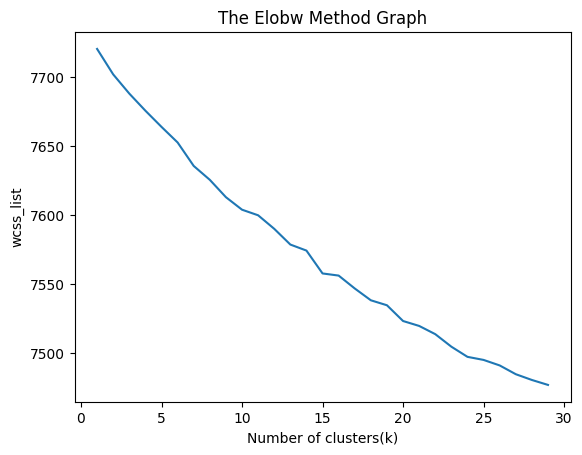

In [71]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [72]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0014
cluster: 3 	 Sillhoute: 0.0016
cluster: 4 	 Sillhoute: 0.0021
cluster: 5 	 Sillhoute: 0.0025
cluster: 6 	 Sillhoute: 0.0034
cluster: 7 	 Sillhoute: 0.0037
cluster: 8 	 Sillhoute: 0.0038
cluster: 9 	 Sillhoute: 0.0042
cluster: 10 	 Sillhoute: 0.0045
cluster: 11 	 Sillhoute: 0.0046
cluster: 12 	 Sillhoute: 0.0048
cluster: 13 	 Sillhoute: 0.0051
cluster: 14 	 Sillhoute: 0.0056
cluster: 15 	 Sillhoute: 0.0061
cluster: 16 	 Sillhoute: 0.0063
cluster: 17 	 Sillhoute: 0.0064
cluster: 18 	 Sillhoute: 0.0062
cluster: 19 	 Sillhoute: 0.0063
cluster: 20 	 Sillhoute: 0.0069
cluster: 21 	 Sillhoute: 0.0067
cluster: 22 	 Sillhoute: 0.0069
cluster: 23 	 Sillhoute: 0.0068
cluster: 24 	 Sillhoute: 0.0072
cluster: 25 	 Sillhoute: 0.0073
cluster: 26 	 Sillhoute: 0.0071
cluster: 27 	 Sillhoute: 0.0074
cluster: 28 	 Sillhoute: 0.0074
cluster: 29 	 Sillhoute: 0.0072


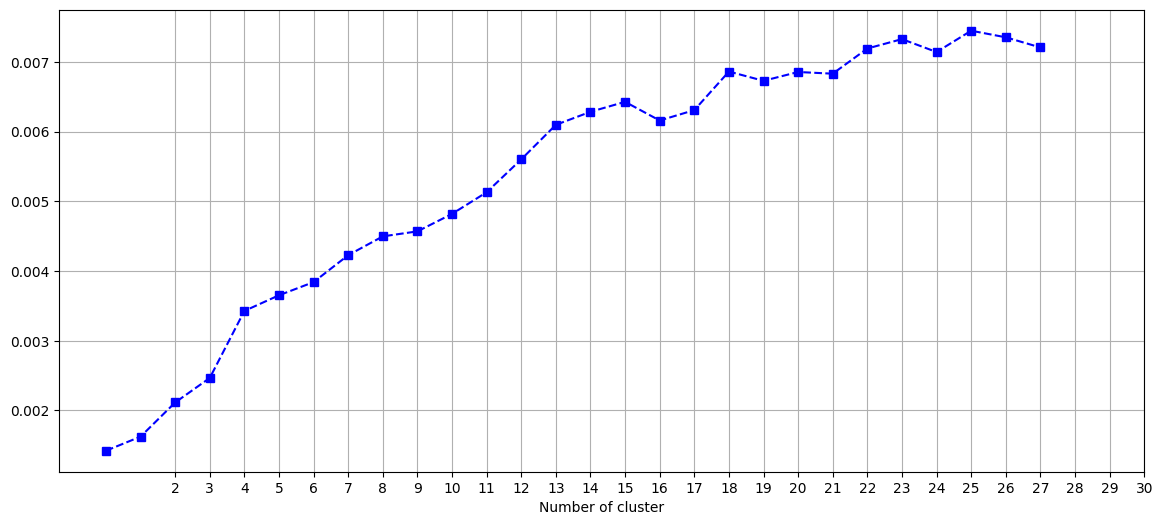

In [73]:
#Plotting Sillhoute's score
plt.figure(figsize=(14,6)) # Set the figsize to adjust the width and height of the plot
plt.plot(sill, 'bs--')
plt.xticks(list(range(2, 31)), list(range(2, 31))) # Adjusted range for tick labels
plt.grid()
plt.xlabel('Number of cluster')
plt.show()

<b/>On the basis of elbow method and sillhoutte score analysis, it is recommended to  form 26 clusters for given dataset and the elbow method helps to determine the optimal number of clusters by evaluating the disortion or inertia, while silhoutette score measures the quality and seperation of the cluster. Both methods indicate that 26 clusters would be appropriate for the dataset based on the available information.italicized text.</b>

In [74]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

**Evaluation**

In [75]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.007218341785521539


In [76]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.193799997853855

In [77]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [78]:
df['cluster'].value_counts()

3     2504
2      532
11     331
5      319
18     289
14     284
1      271
7      268
23     234
12     232
10     224
17     223
16     209
8      205
19     192
15     189
21     175
4      158
0      155
24     150
22     140
9      138
20     108
25      89
13      79
6       72
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

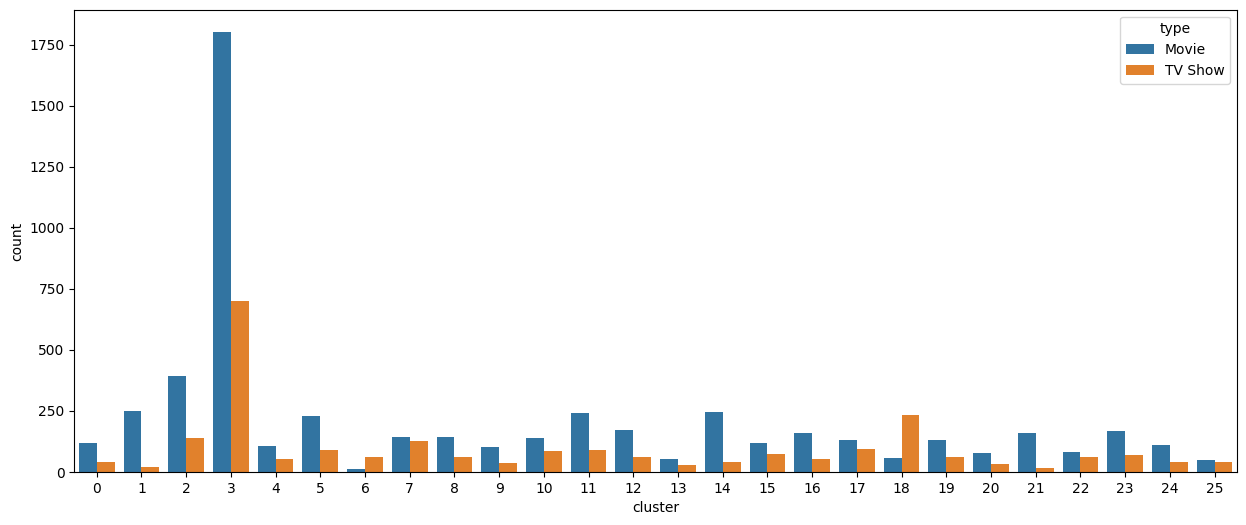

In [79]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

* Based on the analysis, it has been observed that cluster 3 contains the highest number of data points compared to other clusters. This indicates that a significant portion of dataset belongs to cluster 3, suggesting that there are certain characterstics or patterns shared insights into the specific attributes or behaviours of the data points within that cluster.

In [80]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

**Dendogram**

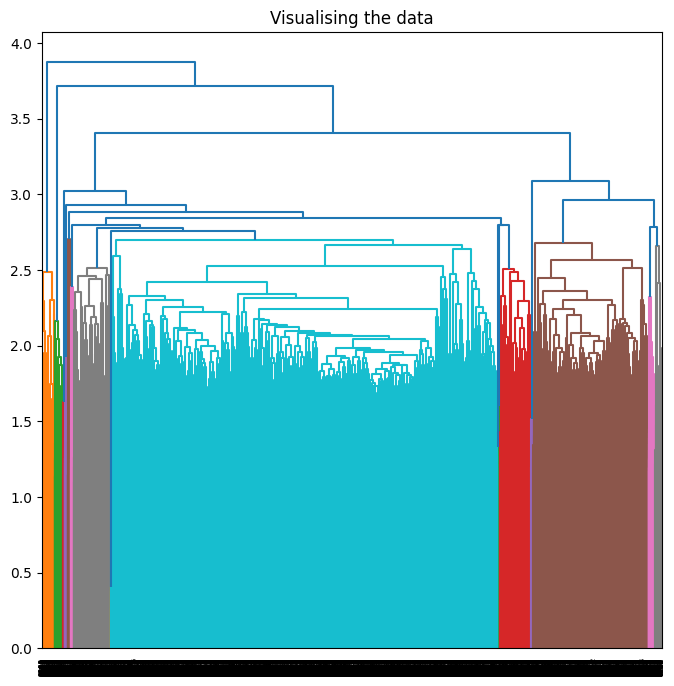

In [81]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

<b/>2.AgglomerativeClustering</b>

In [82]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [83]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,count,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,Adults,8,1,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,Adults,12,1,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,Adults,12,1,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,Teens,11,1,1
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,Teens,1,1,0


**Evaluation**

In [84]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.002


In [85]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

13.979382092977453

###<b/>Seaborn scatterplot of the cluster</b>

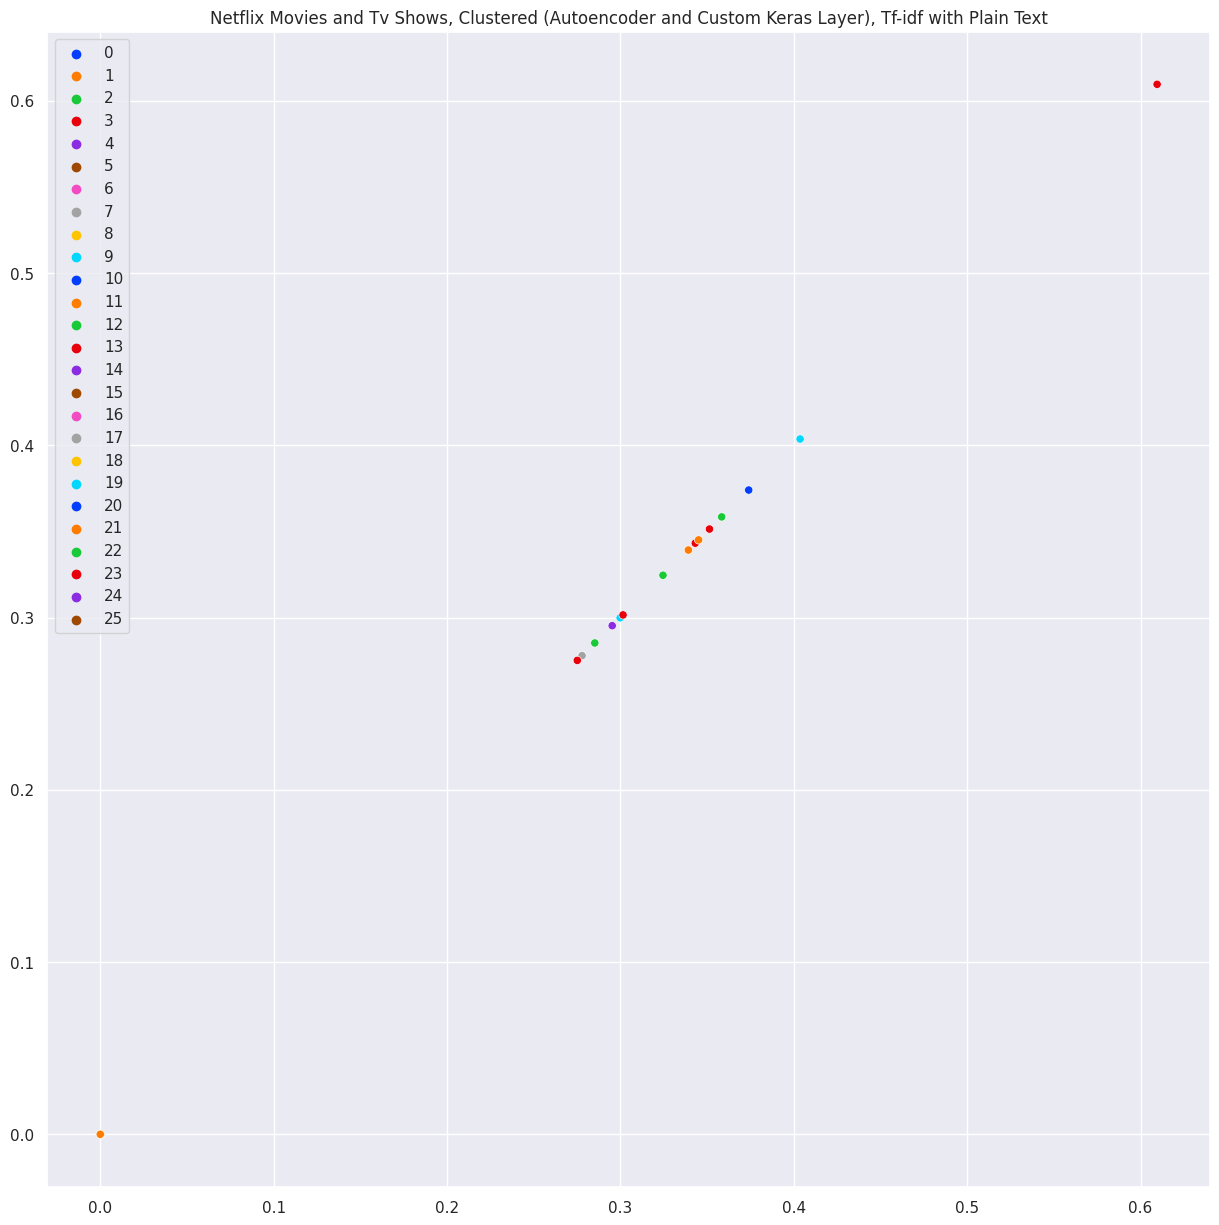

In [86]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_predict)))

# plot
sns.scatterplot(x=X[:, 1], y=X[:, 1], hue=y_predict, palette=palette)
plt.title("Netflix Movies and Tv Shows, Clustered (Autoencoder and Custom Keras Layer), Tf-idf with Plain Text")
plt.savefig('output2.png')
plt.show()


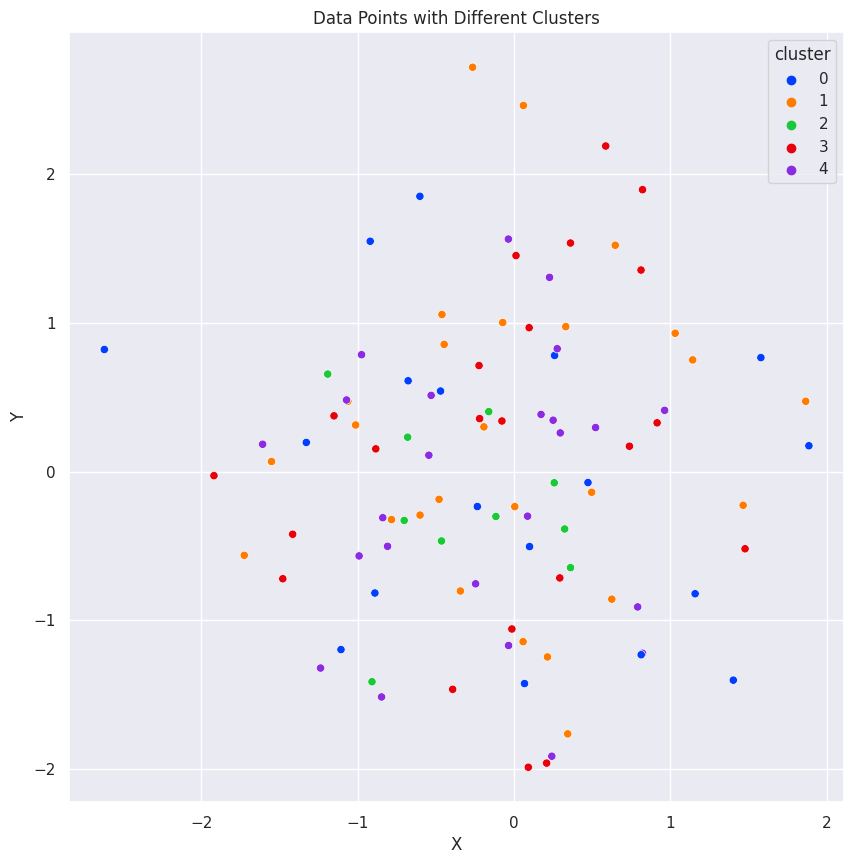

In [87]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

#Generate random data for demonstrate and replace this section with your own data

np.random.seed(42)
data=np.random.randn(100, 2)
clusters = np.random.randint(0,5, size=100)

# convert data to DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['cluster'] = clusters

# sns setting
sns.set(rc={'figure.figsize':(10, 10)})

# colors
palette = sns.color_palette("bright", len(set(df['cluster'])))

# plot
sns.scatterplot(x='X', y='Y', hue='cluster', data=df, palette=palette)
plt.title("Data Points with Different Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(title='cluster', loc='best')
plt.show()

#<b/>Conclusion</b>

- Evaluation of elbow and silhouette scores, the optimal number of clusters is determined to be 26. K Means clustering is more accepatable  than hierarchical cluster, as the evaluation metrics also indicates the same in kmean cluster 0 has the highest number of datapoints.

and uniformly distributed for other cluster.

- There are 5372 movies and 2398 Tv shows available on this netflix platform.

There are more number of movies as compared to Tv shows.

- Tv-MA which represent adult ratings, has the highest number of ratings amid Tv shows. This recommended that adult-oriented content recieves a significant amount of spectator or viewership and popularity on Netflix.


- In 2017 and 2018 there are highest number of movies released on netfilx.

highest number of movies released in 2020 The number of movies on Netflix is increasing significantly faster than the number of TV shows. We spotted a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows.

- In the period of October to January sees the highest influx of content being added to Netflix.


- Documentaries are the top most genre in netflix which is followed by standup comedy and Drams and international movies.


- kids tv is the top most TV show genre in netflix.


- The majority of movies on Netflix have a duration ranging from 50 to 150 minutes, indicating a wide variety of runtime options for viewers to choose from.


- highest number of tv_shows consistig of single season

- Those movies that have a rating of NC-17 have the longest average duration.

- When it comes to movies having a TV-Y rating, they have the shortest runtime on average

- united states has the highest number of content on the netflix ,followed by india

- india has highest number of movies in netflix

- 30% movies released on Netflix.

- 70% movies added on Netflix were released earlier by different mode.

